In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

data = pd.read_csv('../Prepared_Data/data.csv')
data_parts = pd.read_csv('../Prepared_Data/data_parts.csv')
data_minifigs = pd.read_csv('../Prepared_Data/data_minifigs.csv')


In [3]:
##### Set the Plot Sheme #####
import tueplots
from tueplots import bundles

# this provides the color palette of Uni Tuebingen
from tueplots.constants.color import rgb
# e.g. as rgb.tue_blue, rgb.tue_red, etc.

# set plotting stylesheet
plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))

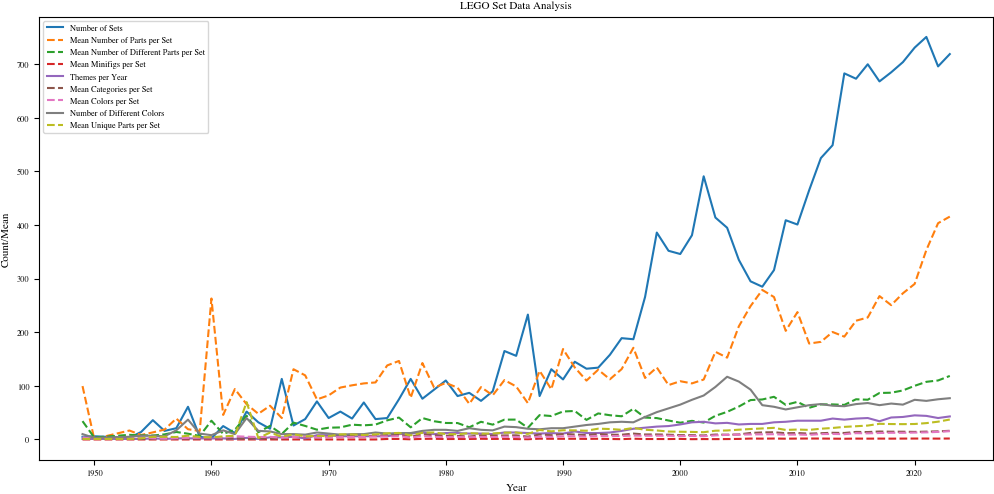

In [32]:
##### Analysis over the years and plot it#####

#### Calculations ###

# ensure 'year' is numeric
data['year']= pd.to_numeric(data['year'], errors='coerce') 

# calculate number of sets per year 
sets_per_year = data.groupby('year')['set_num'].nunique()

# calculate mean number of parts per year per set
mean_parts_per_set_per_year = data.groupby('year')['number_of_parts'].mean()

# calculate mean number of minifigs per year
mean_minifigs_per_set_per_year = data.groupby('year')['minifig_quantitiy'].mean()

# calculate the mean number of colors per set
mean_colors_per_set_per_year = data.groupby('year')['number_of_colors'].mean()

# calculate number of colors per year
grouped_colors = data_parts.groupby(['color_id', 'year']).size().reset_index(name='count')    # Count unique colors per year
colors_per_year = grouped_colors.groupby('year')['color_id'].count()                          # Calculate count per year

# calculate mean number of unique parts per set per year
mean_unique_parts_per_set_per_year = data.groupby('year')['number_of_unique_parts'].mean()

# calculate the themes per year
themes_per_year = data.groupby('year')['theme_id'].nunique()

# calculate the mean number of categories per set
mean_categories_per_set_per_year = data.groupby('year')['number_of_categories'].mean()

# calculate the mean number of different parts per set
mean_number_of_different_parts_per_set_per_year = data.groupby('year')['number_of_different_parts'].mean()


### Plot ###

# set up the plot for the analysis
plt.figure(figsize=(10, 5))

# plot number of sets per year
plt.plot(sets_per_year.index, sets_per_year, label='Number of Sets')

# plot mean number of parts per set per year
plt.plot(mean_parts_per_set_per_year.index, mean_parts_per_set_per_year, label='Mean Number of Parts per Set', linestyle='--')

# plot mean number of different parts per set per year
plt.plot(mean_number_of_different_parts_per_set_per_year.index, mean_number_of_different_parts_per_set_per_year, label='Mean Number of Different Parts per Set', linestyle='--')

# plot mean number of minifigs per set per year
plt.plot(mean_minifigs_per_set_per_year.index, mean_minifigs_per_set_per_year, label='Mean Minifigs per Set', linestyle='--')

# plot themes per year
plt.plot(themes_per_year.index, themes_per_year, label='Themes per Year')

# plot mean number of categories per set per year
plt.plot(mean_categories_per_set_per_year.index, mean_categories_per_set_per_year, label='Mean Categories per Set', linestyle='--')

# plot mean number of colors per set per year
plt.plot(mean_colors_per_set_per_year.index, mean_colors_per_set_per_year, label='Mean Colors per Set', linestyle='--')

# plot the number of colors per set per year
plt.plot(colors_per_year.index, colors_per_year, label='Number of Different Colors')

# plot mean number of unique parts per set per year
plt.plot(mean_unique_parts_per_set_per_year.index, mean_unique_parts_per_set_per_year, label='Mean Unique Parts per Set', linestyle='--')


# set plot labels and title
plt.xlabel('Year')
plt.ylabel('Count/Mean')
plt.title('LEGO Set Data Analysis')
plt.legend()

# save plot
plt.savefig('../Images/Exploration.pdf')

# show the plot
plt.show()


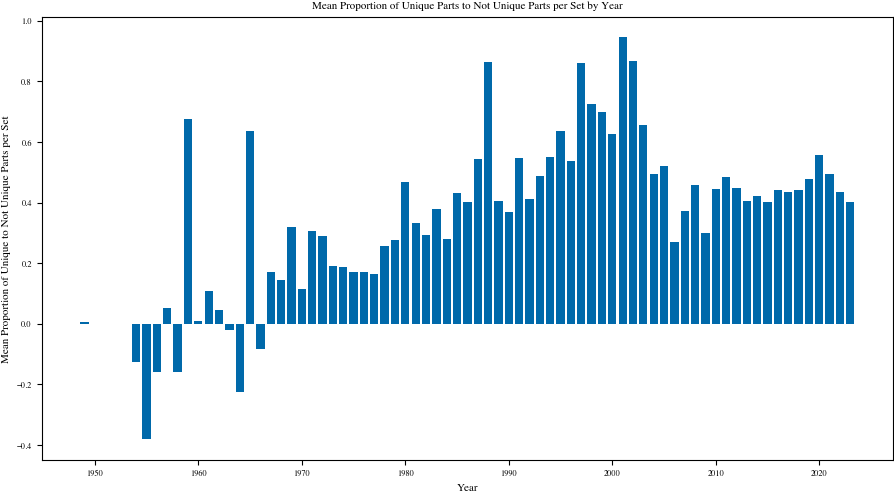

In [37]:
def plot_proportion(df):

    # calculate the proportion for each set
    df['not_unique_parts'] = df['number_of_parts'] - df['number_of_unique_parts']
    df['proportion_unique_to_not_unique'] = np.divide(df['number_of_unique_parts'], df['not_unique_parts'], out=np.zeros_like(df['number_of_unique_parts']), where=df['not_unique_parts']!=0)

    # group the data by year
    grouped = df.groupby('year')

    # calculate the mean proportion per set for each year
    df_yearly = grouped['proportion_unique_to_not_unique'].mean()

    # plot the results
    plt.figure(figsize=(9,5))
    plt.bar(df_yearly.index, df_yearly, color=rgb.tue_blue)
    plt.xlabel('Year')
    plt.ylabel('Mean Proportion of Unique to Not Unique Parts per Set')
    plt.title('Mean Proportion of Unique Parts to Not Unique Parts per Set by Year')
    plt.show()

plot_proportion(data)

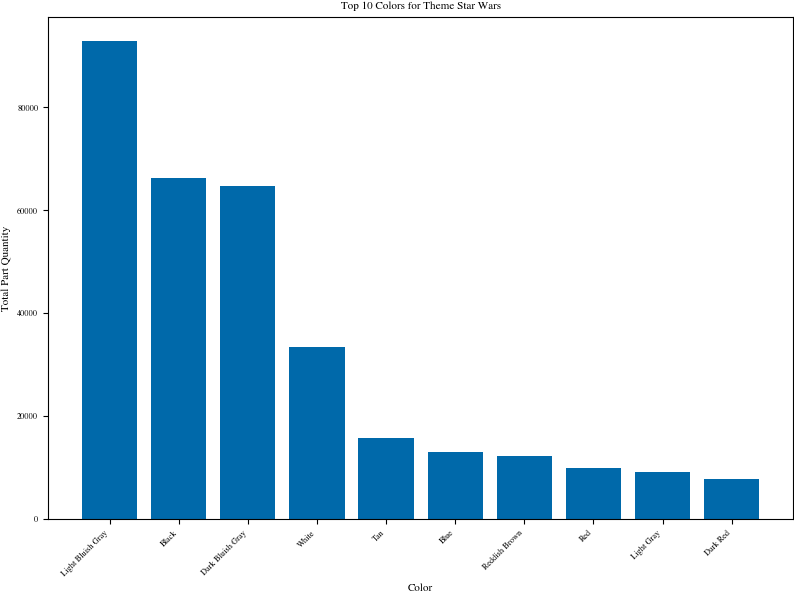

In [38]:
##### Analyse the data with the colour ####

def top_colors_for_theme(data, theme_name):
    # filter the dataset for the specific theme
    theme_data = data[data['theme_name'] == theme_name]

    # group by color and sum the part quantities to get the total count for each color
    color_counts = theme_data.groupby('color_name')['part_quantity'].sum().reset_index()

    # sort the colors by count in descending order
    sorted_colors = color_counts.sort_values(by='part_quantity', ascending=False)

    # take the top 10 colors
    top_10_colors = sorted_colors.head(10)

    return top_10_colors

def plot_top_colors(data, theme_name):
    # use the function to get the top colors
    top_colors_data = top_colors_for_theme(data, theme_name)

    # plot the data
    plt.figure(figsize=(8, 6))
    plt.bar(top_colors_data['color_name'], top_colors_data['part_quantity'],  color=rgb.tue_blue)
    plt.xlabel('Color')
    plt.ylabel('Total Part Quantity')
    plt.title(f'Top 10 Colors for Theme {theme_name}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_top_colors(data_parts, 'Star Wars')

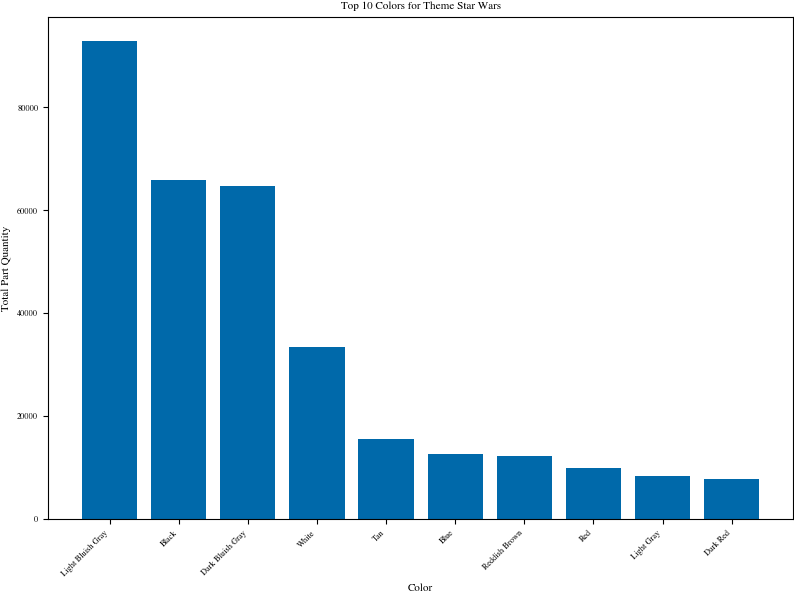

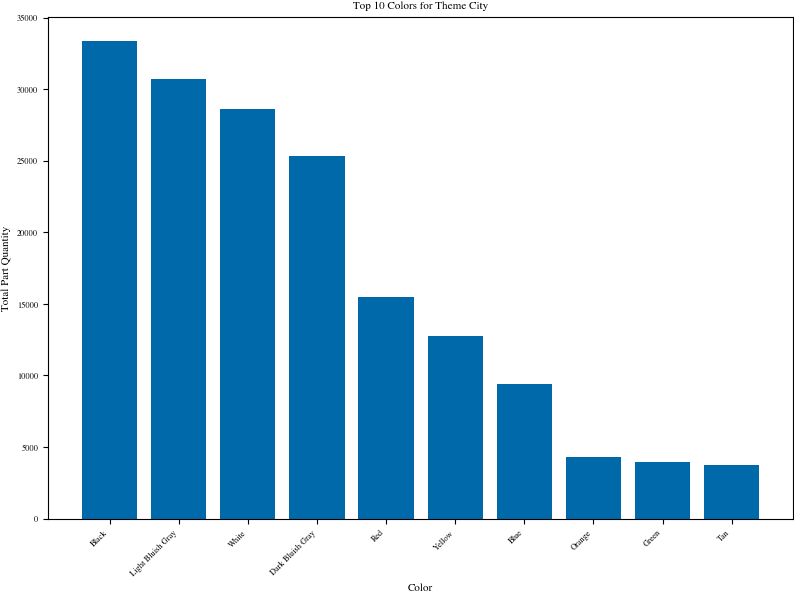

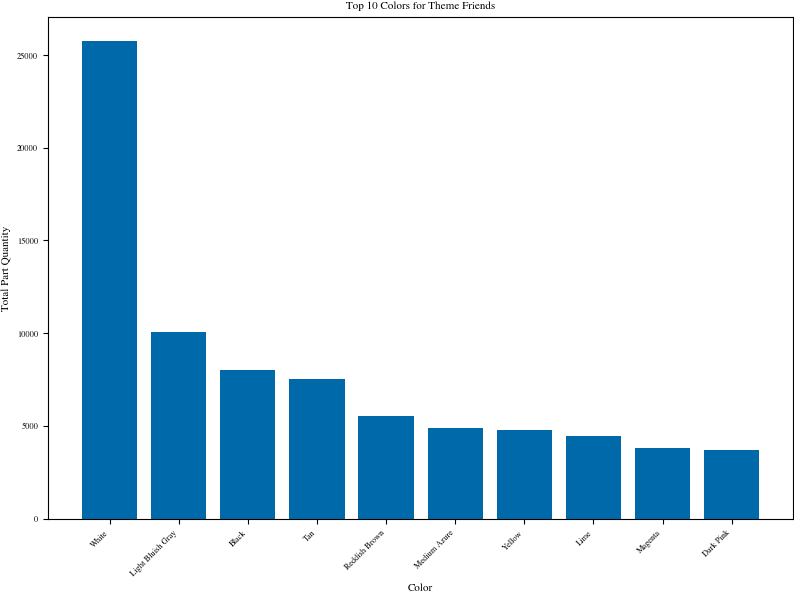

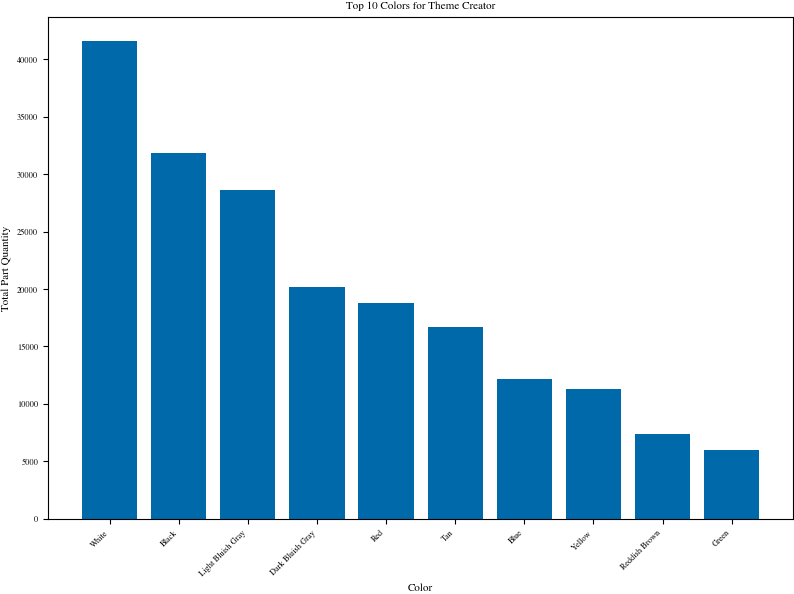

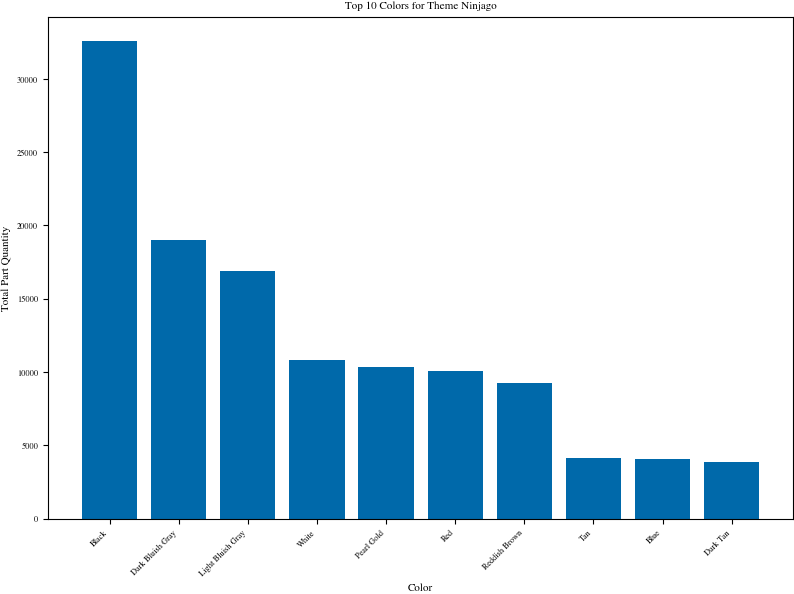

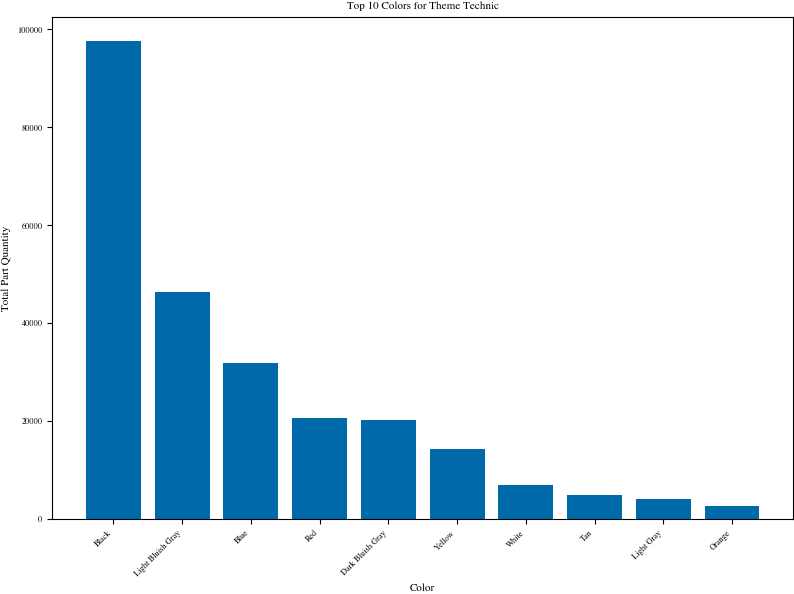

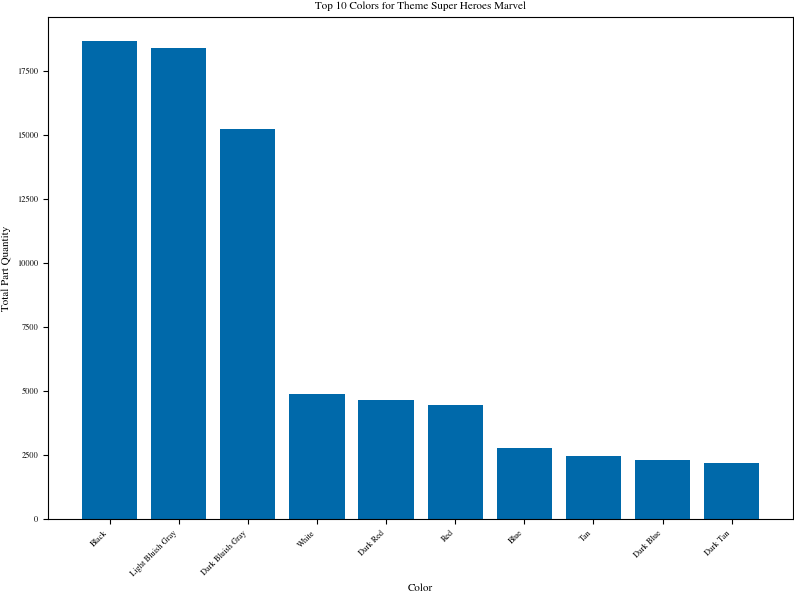

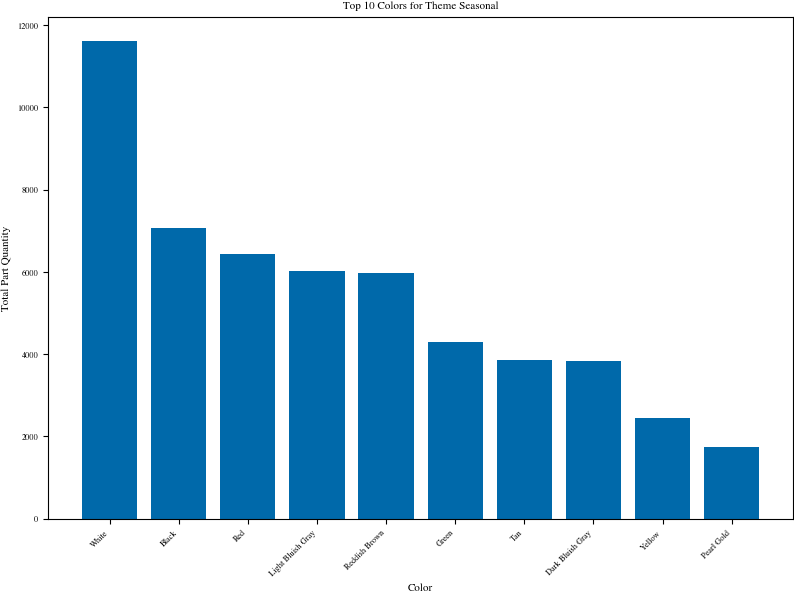

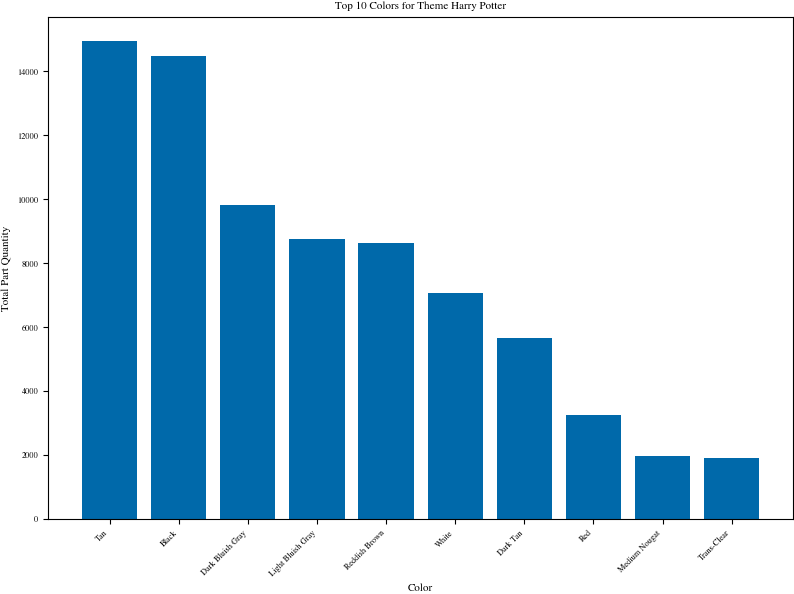

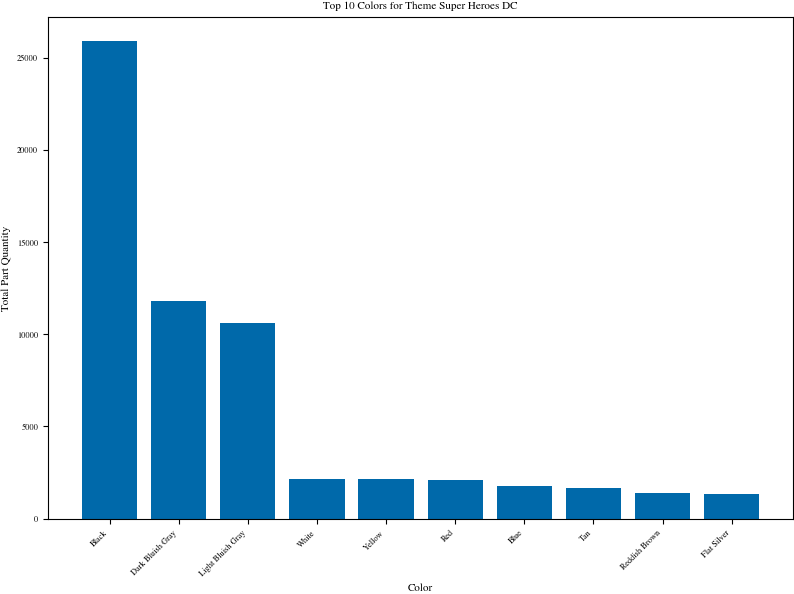

In [39]:
##### Plot the top 10 colors, for each of the top 10 themes between 2000 & 2023 ######

def plot_top_colors_for_top_themes(df):

    # filter rows between 2000 and 2023
    df = df[(df['year'] >= 2000) & (df['year'] <= 2023)]

    # group by theme_name and calculate the total number of sets for each theme
    theme_sets = df.groupby('theme_name')['set_num'].size()

    # get the top 10 themes with the most sets
    top_themes = theme_sets.nlargest(10).index

    # for each of the top 10 themes, plot the top 10 colors
    for theme in top_themes:

        plot_top_colors(df, theme)

plot_top_colors_for_top_themes(data_parts)


In [8]:
##### Find the different themes in the last 23 years #####

df_filtered = data[(data['year'] >= 2000) & (data['year'] <= 2023)]       # filter for years 2000 to 2023
theme_names_last_years = df_filtered['theme_name'].unique()               # get unique themes per year

print(theme_names_last_years)        

['Pirates' 'City' 'Town' 'Castle' 'Educational and Dacta' 'Sports'
 'Creator' 'Modular Buildings' 'Games' 'Gear' 'Make & Create'
 'Designer Sets' 'Sculptures' 'BrickLink Designer Program' 'Harry Potter'
 'Super Mario' 'Star Wars' 'Ninjago' 'Seasonal' 'LEGO Ideas and CUUSOO'
 'Super Heroes Marvel' 'Disney' 'Avatar' 'Sonic The Hedgehog' 'Classic'
 'SpongeBob SquarePants' 'Cars' 'Toy Story' 'Studios' 'Super Heroes DC'
 'Legoland Parks' 'Racers' 'Inventor' 'Train' 'Juniors' 'Jurassic World'
 'FIRST LEGO League' 'Mixels' 'LEGO Brand Store' 'Exo-Force' 'Other'
 'The Hobbit and Lord of the Rings' 'LEGO Exclusive' 'X-Pod' 'Friends'
 'Disney Princess' 'Nexo Knights' 'Brickheadz' 'Indiana Jones' 'Factory'
 'Legends of Chima' 'Adventurers' 'The LEGO Movie' 'Trolls: World Tour'
 'Books' 'Promotional' 'Chinese Traditional Festivals' '4 Juniors'
 'Hidden Side' 'Icons' 'Space' 'Dimensions' 'Unikitty!' 'Fusion'
 'DC Super Hero Girls' 'Architecture' 'Minecraft' 'Brick Sketches'
 'Monkie Kid' 'Elves' 'D

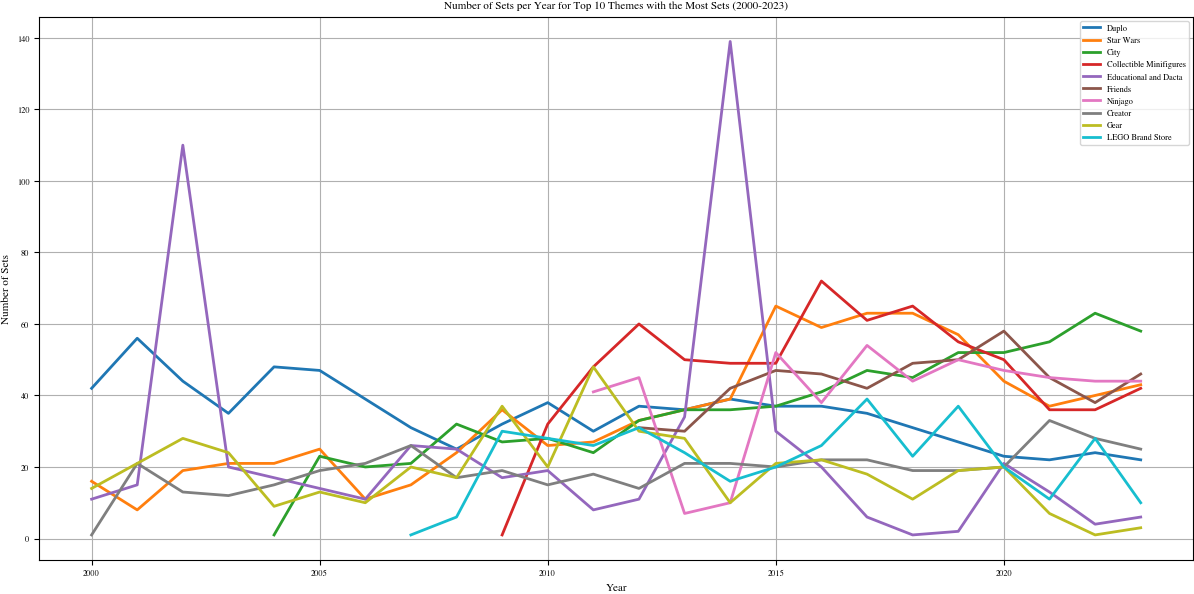

In [43]:
##### Plot the top 10 themes (most sets) over the years 2000 - 2023 #####

def plot_top_themes_and_sets(df):

    # filter rows between 2000 and 2023
    df = df[(df['year'] >= 2000) & (df['year'] <= 2023)]

    # group by theme_name and calculate the total number of sets for each theme
    theme_sets = df.groupby('theme_name')['set_num'].size()

    # get the top 10 themes with the most sets
    top_themes = theme_sets.nlargest(10).index

    # filter rows for top 10 themes
    df = df[df['theme_name'].isin(top_themes)]

    # group by year and theme_name, and count the number of sets
    df_grouped = df.groupby(['year', 'theme_name']).size().unstack()

    # plot
    plt.figure(figsize=(12, 6))
    for theme in top_themes:
        plt.plot(df_grouped.index, df_grouped[theme], marker='', linewidth=2, label=theme)

    plt.title('Number of Sets per Year for Top 10 Themes with the Most Sets (2000-2023)')
    plt.xlabel('Year')
    plt.ylabel('Number of Sets')
    plt.legend()
    plt.grid(True)
    plt.show()

# call the function
plot_top_themes_and_sets(data)

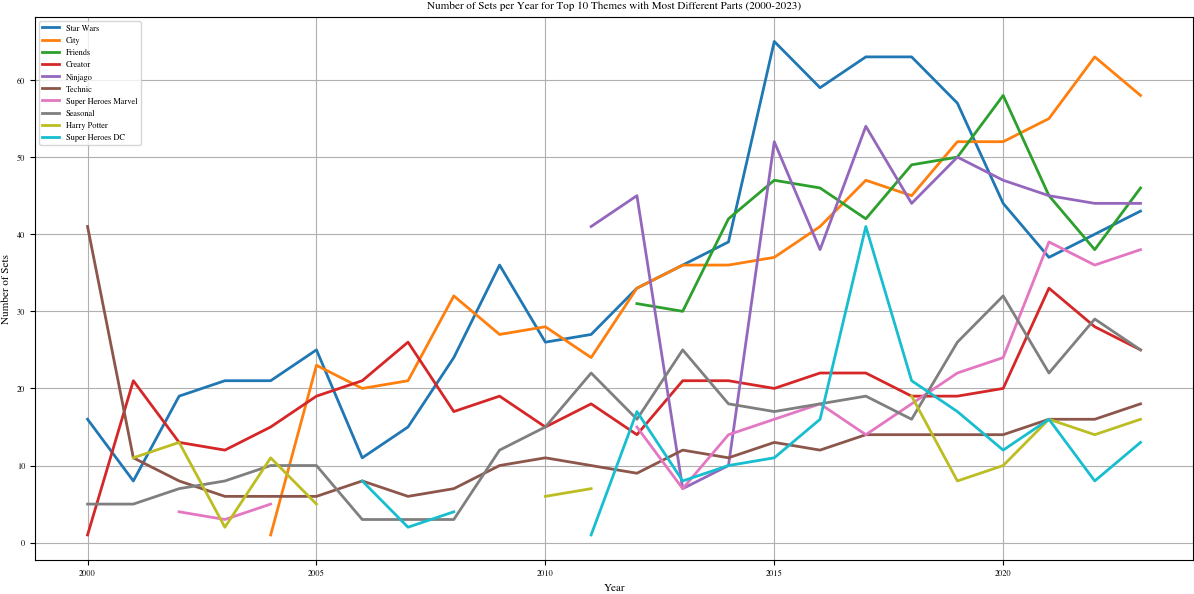

In [10]:
##### Plot the top 10 themes (most different parts) over the years 2000 - 2023 #####

def plot_top_themes_and_different_parts(df):
    # filter rows between 2000 and 2023
    df = df[(df['year'] >= 2000) & (df['year'] <= 2023)]

    # group by theme_name and calculate the total number of parts for each theme
    theme_parts = df.groupby('theme_name')['number_of_different_parts'].sum()

    # get the top 10 themes with the most parts
    top_themes = theme_parts.nlargest(10).index

    # filter rows for top 10 themes
    df = df[df['theme_name'].isin(top_themes)]

    # group by year and theme_name, and count the number of sets
    df_grouped = df.groupby(['year', 'theme_name']).size().unstack()

    # plot
    plt.figure(figsize=(12, 6))
    for theme in top_themes:
        plt.plot(df_grouped.index, df_grouped[theme], marker='', linewidth=2, label=theme)

    plt.title('Number of Sets per Year for Top 10 Themes with Most Different Parts (2000-2023)')
    plt.xlabel('Year')
    plt.ylabel('Number of Sets')
    plt.legend()
    plt.grid(True)
    plt.show()

# call the function
plot_top_themes_and_different_parts(data)

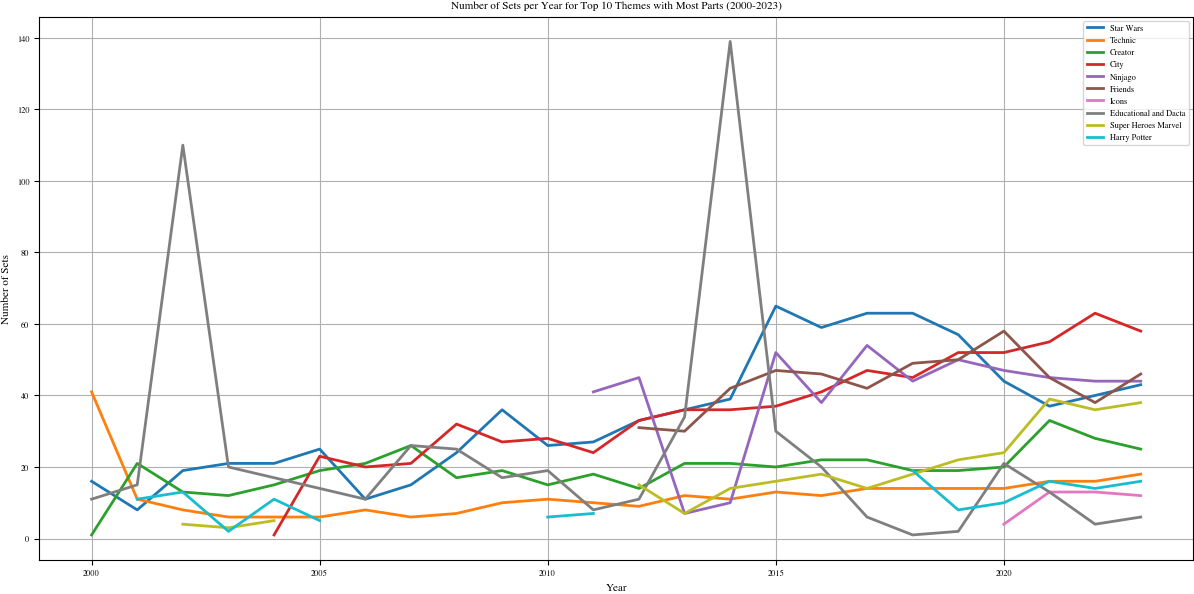

In [11]:
##### Plot the top 10 themes (most parts) over the years 2000 - 2023 #####

def plot_top_themes_and_parts(df):
    # filter rows between 2000 and 2023
    df = df[(df['year'] >= 2000) & (df['year'] <= 2023)]

    # group by theme_name and calculate the total number of parts for each theme
    theme_parts = df.groupby('theme_name')['number_of_parts'].sum()

    # get the top 10 themes with the most parts
    top_themes = theme_parts.nlargest(10).index

    # filter rows for top 10 themes
    df = df[df['theme_name'].isin(top_themes)]

    # group by year and theme_name, and count the number of sets
    df_grouped = df.groupby(['year', 'theme_name']).size().unstack()

    # plot
    plt.figure(figsize=(12, 6))
    for theme in top_themes:
        plt.plot(df_grouped.index, df_grouped[theme], marker='', linewidth=2, label=theme)

    plt.title('Number of Sets per Year for Top 10 Themes with Most Parts (2000-2023)')
    plt.xlabel('Year')
    plt.ylabel('Number of Sets')
    plt.legend()
    plt.grid(True)
    plt.show()

# call the function
plot_top_themes_and_parts(data)

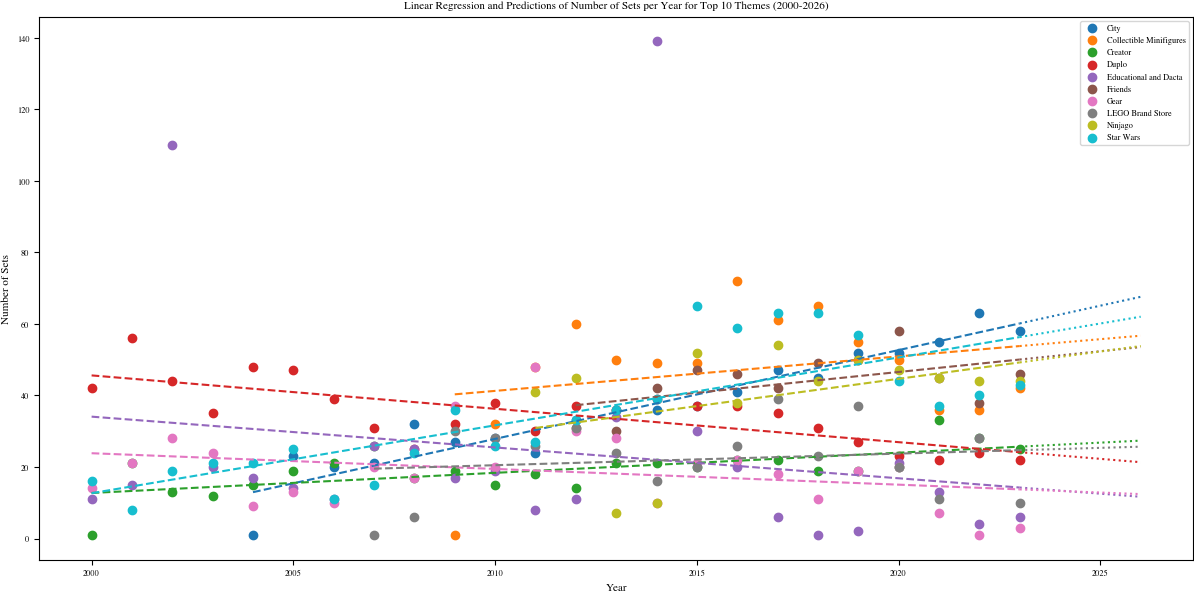

In [12]:
##### Make a linear regression for the number of sets with prediction until 2030 #####

def linear_regression_sets(df):

    # filter rows between 2000 and 2023
    df = df[(df['year'] >= 2000) & (df['year'] <= 2023)]

    # group by theme_name and calculate the total number of parts for each theme
    theme_sets = df.groupby('theme_name')['set_num'].size()

    # get the top 10 themes with the most parts
    top_themes = theme_sets.nlargest(10).index

    # filter rows for top 10 themes
    df_top_themes = df[df['theme_name'].isin(top_themes)]

    # sets per year
    sets_per_year = df_top_themes.groupby(['theme_name', 'year']).size().reset_index(name='number_of_sets')

    # initialize the model
    model = LinearRegression()

    plt.figure(figsize=(12, 6))

    for theme in sets_per_year['theme_name'].unique():
        data = sets_per_year[sets_per_year['theme_name'] == theme]
        x = data['year'].values.reshape(-1, 1)
        y = data['number_of_sets'].values
        model = LinearRegression().fit(x, y)
        y_pred = model.predict(x)
        plt.scatter(x, y, label=theme)
        plt.plot(x, y_pred, linestyle='--')

        # make predictions until 2026
        x_future = np.arange(2023, 2027).reshape(-1, 1)
        y_future_pred = model.predict(x_future)
        plt.plot(x_future, y_future_pred, linestyle=':', color=plt.gca().lines[-1].get_color())

    # add title and labels
    plt.title('Linear Regression and Predictions of Number of Sets per Year for Top 10 Themes (2000-2026)')
    plt.xlabel('Year')
    plt.ylabel('Number of Sets')
    plt.legend()

    # show the plot
    plt.show()

# call the function
linear_regression_sets(data)

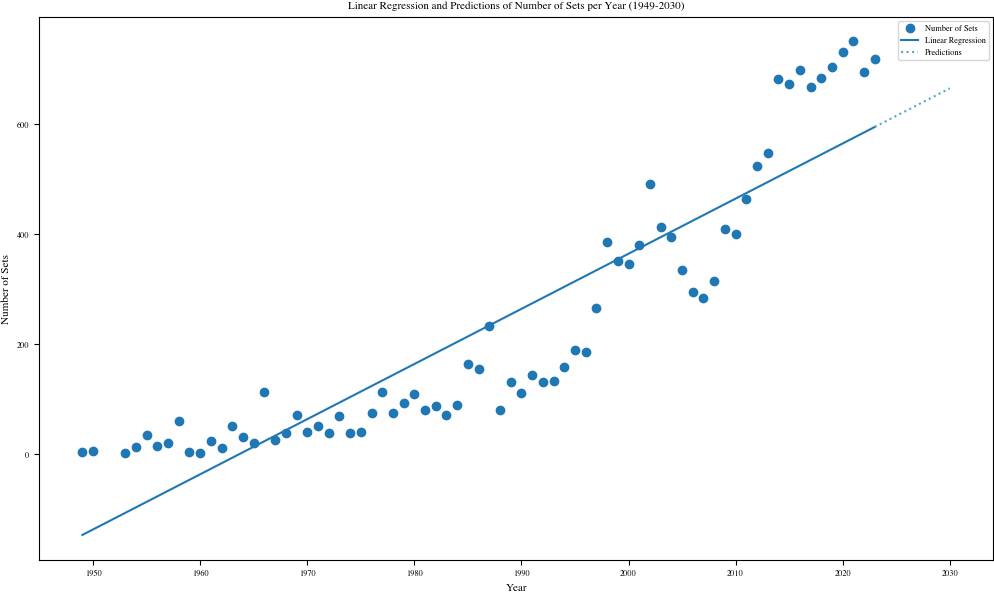

In [45]:
##### Make a linear regression for the number of sets with prediction until 2030 #####

def linear_regression_sets(df):

    # group by 'year', and count distinct 'set_num'
    sets_per_year = df.groupby('year').size().reset_index(name='number_of_sets')

    # create the plot
    plt.figure(figsize=(10, 6))
    x = sets_per_year['year'].values.reshape(-1, 1)
    y = sets_per_year['number_of_sets'].values
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    plt.scatter(x, y, label='Number of Sets')
    plt.plot(x, y_pred, linestyle='-', label='Linear Regression')

    # Make predictions until 2030
    x_future = np.arange(2023, 2031).reshape(-1, 1)
    y_future_pred = model.predict(x_future)
    plt.plot(x_future, y_future_pred, linestyle=':', color=rgb.tue_lightblue, label='Predictions')

    # add title and labels
    plt.title('Linear Regression and Predictions of Number of Sets per Year (1949-2030)')
    plt.xlabel('Year')
    plt.ylabel('Number of Sets')
    plt.legend()

    # show the plot
    plt.show()

# call the function
linear_regression_sets(data)

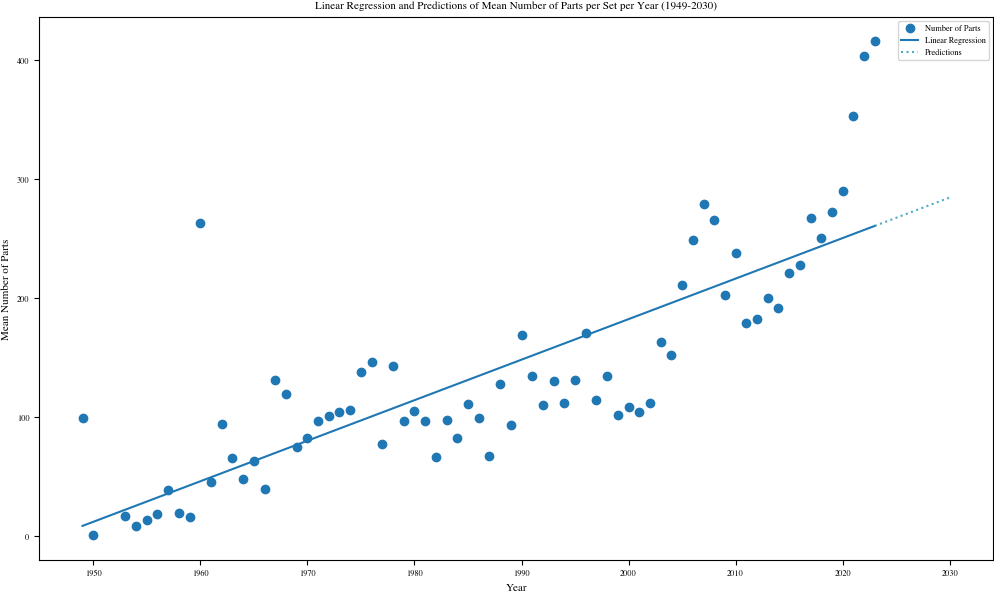

In [49]:
def linear_regression_parts(df):
    
    mean_parts_per_set_per_year = df.groupby('year')['number_of_parts'].mean().reset_index(name='number_of_parts')

    # create the plot
    plt.figure(figsize=(10, 6))
    x = mean_parts_per_set_per_year['year'].values.reshape(-1, 1)
    y = mean_parts_per_set_per_year['number_of_parts'].values
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    plt.scatter(x, y, label='Number of Parts')
    plt.plot(x, y_pred, linestyle='-', label='Linear Regression')

    # make predictions until 2030
    x_future = np.arange(2023, 2031).reshape(-1, 1)
    y_future_pred = model.predict(x_future)
    plt.plot(x_future, y_future_pred, linestyle=':', color=rgb.tue_lightblue, label='Predictions')

    # add title and labels
    plt.title('Linear Regression and Predictions of Mean Number of Parts per Set per Year (1949-2030)')
    plt.xlabel('Year')
    plt.ylabel('Mean Number of Parts')
    plt.legend()

    # show the plot
    plt.show()

# call the function with
linear_regression_parts(data)

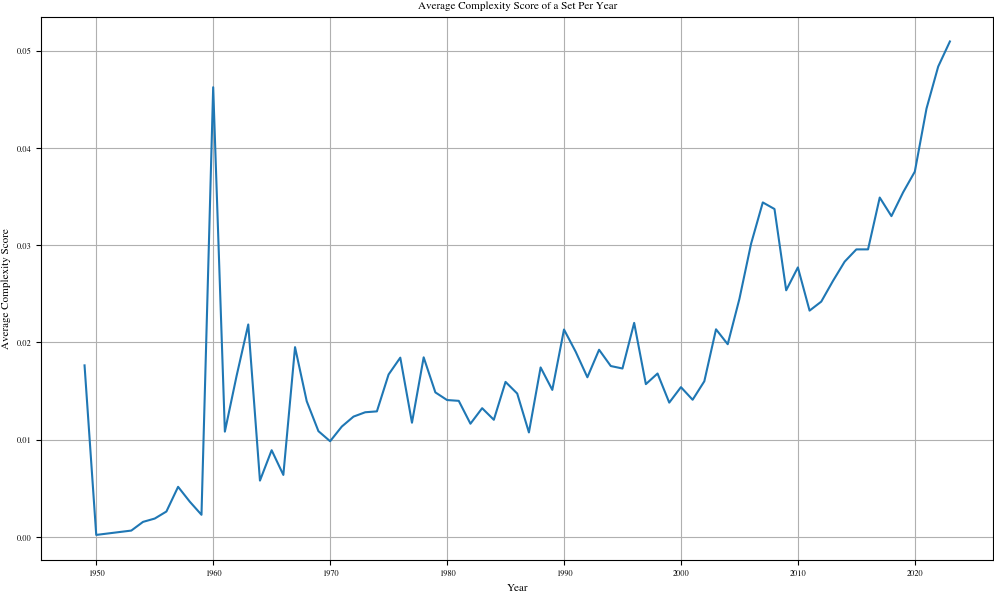

In [15]:
##### Plot mean complexity per set per year #####

def plot_set_complexitxy(df):
    # calculate mean number of complexity per set per year
    average_complexity_per_year = df.groupby('year')['complexity_score'].mean()

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(average_complexity_per_year.index, average_complexity_per_year.values)
    plt.xlabel('Year')
    plt.ylabel('Average Complexity Score')
    plt.title('Average Complexity Score of a Set Per Year')
    plt.grid(True)
    plt.show()

# call function
plot_set_complexitxy(data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


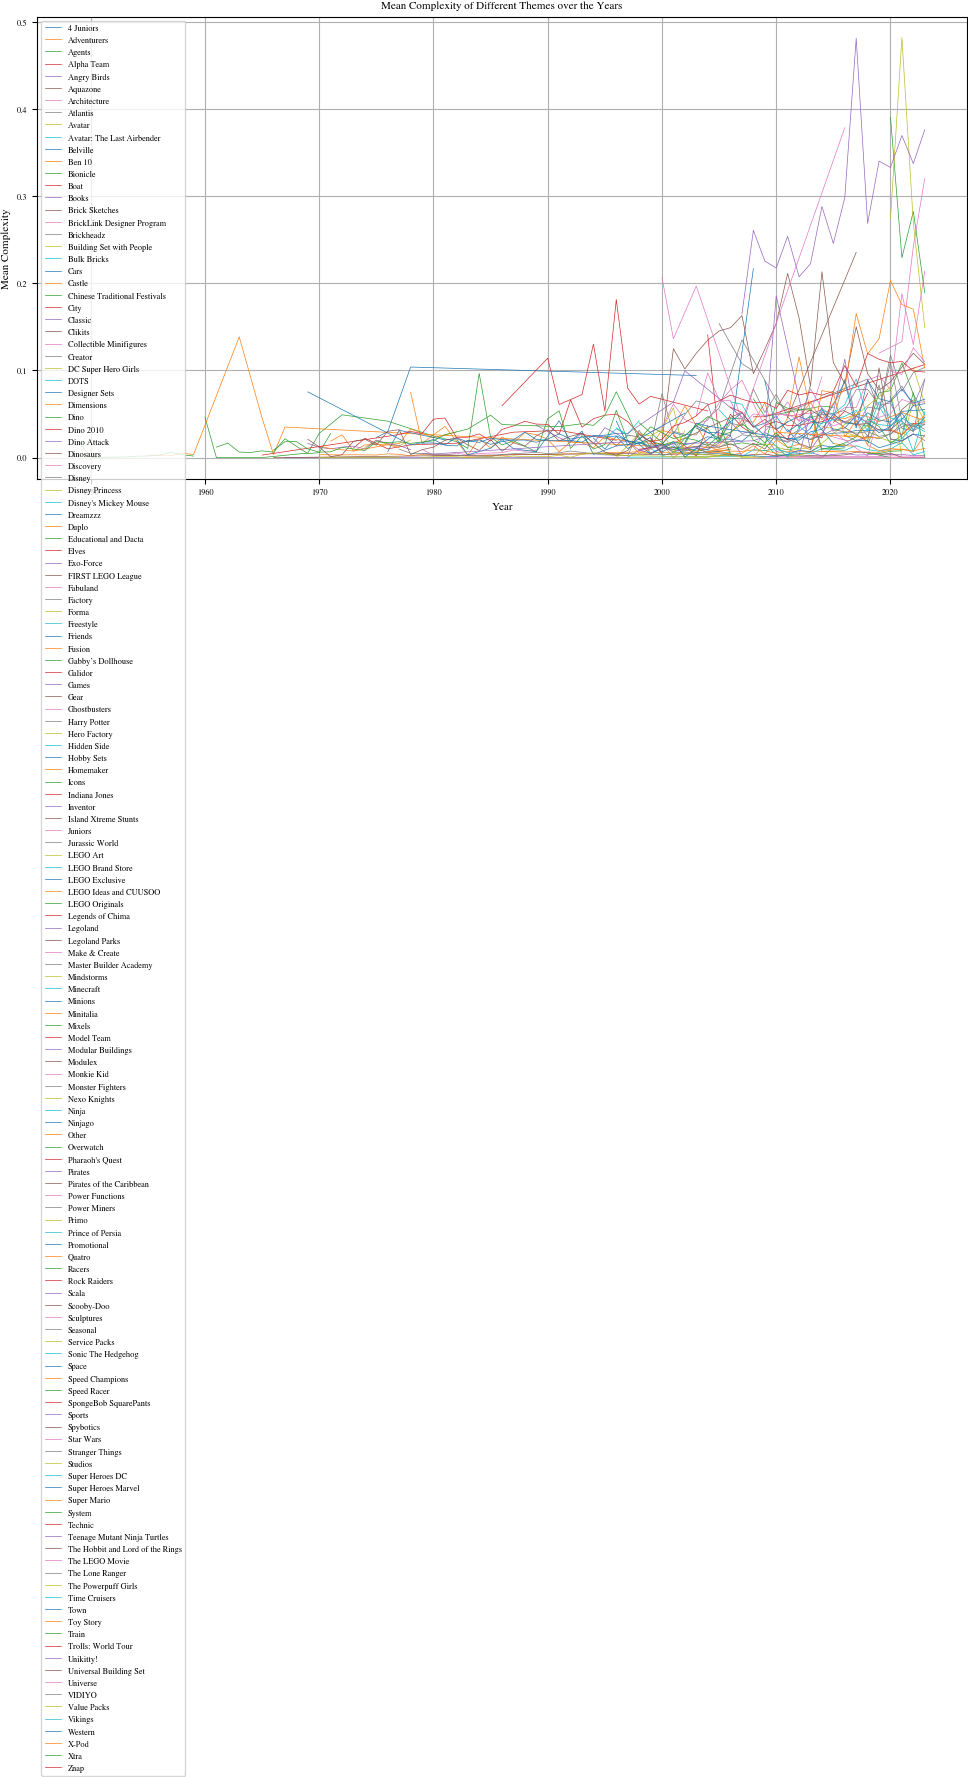

In [16]:
##### Plot the complexity for different themes per year #####

def plot_themes_and_complexity(df):
    # calculate mean complexity
    mean_complexity = df.groupby(['theme_name', 'year'])['complexity_score'].mean().reset_index(name='complexity_score')

    # plot
    plt.figure(figsize=(12, 6))
    for theme in mean_complexity['theme_name'].unique():
        selected_theme_df = mean_complexity[mean_complexity['theme_name'] == theme]
        plt.plot(selected_theme_df['year'], selected_theme_df['complexity_score'], linewidth=0.5, label=theme)

    plt.title('Mean Complexity of Different Themes over the Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Complexity')
    plt.legend()
    plt.grid(True)
    plt.show()

# call the function
plot_themes_and_complexity(data)

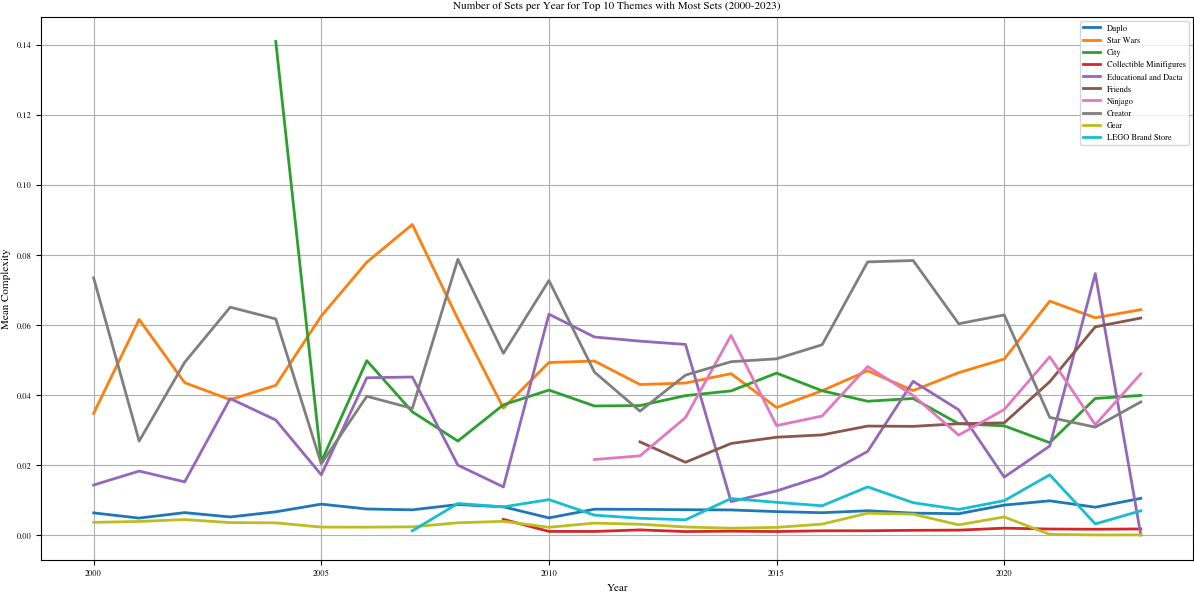

In [17]:
##### Plot the complexity for different themes per year #####

def plot_top_themes_and_complexity(df):
    
    # filter rows between 2000 and 2023
    df = df[(df['year'] >= 2000) & (df['year'] <= 2023)]


    # group by theme_name and calculate the total number of parts for each theme
    theme_sets = df.groupby('theme_name')['set_num'].size()

    # get the top 10 themes with the most sets
    top_themes = theme_sets.nlargest(10).index

    # filter rows for top 10 themes
    df = df[df['theme_name'].isin(top_themes)]

    # calculate mean complexity
    mean_complexity = df.groupby(['theme_name', 'year'])['complexity_score'].mean().reset_index(name='complexity_score')

    # plot
    plt.figure(figsize=(12, 6))
    for theme in top_themes:
        selected_theme_df = mean_complexity[mean_complexity['theme_name'] == theme]
        plt.plot(selected_theme_df['year'], selected_theme_df['complexity_score'], marker='', linewidth=2, label=theme)

    plt.title('Number of Sets per Year for Top 10 Themes with Most Sets (2000-2023)')
    plt.xlabel('Year')
    plt.ylabel('Mean Complexity')
    plt.legend()
    plt.grid(True)
    plt.show()

# call the function
plot_top_themes_and_complexity(data)

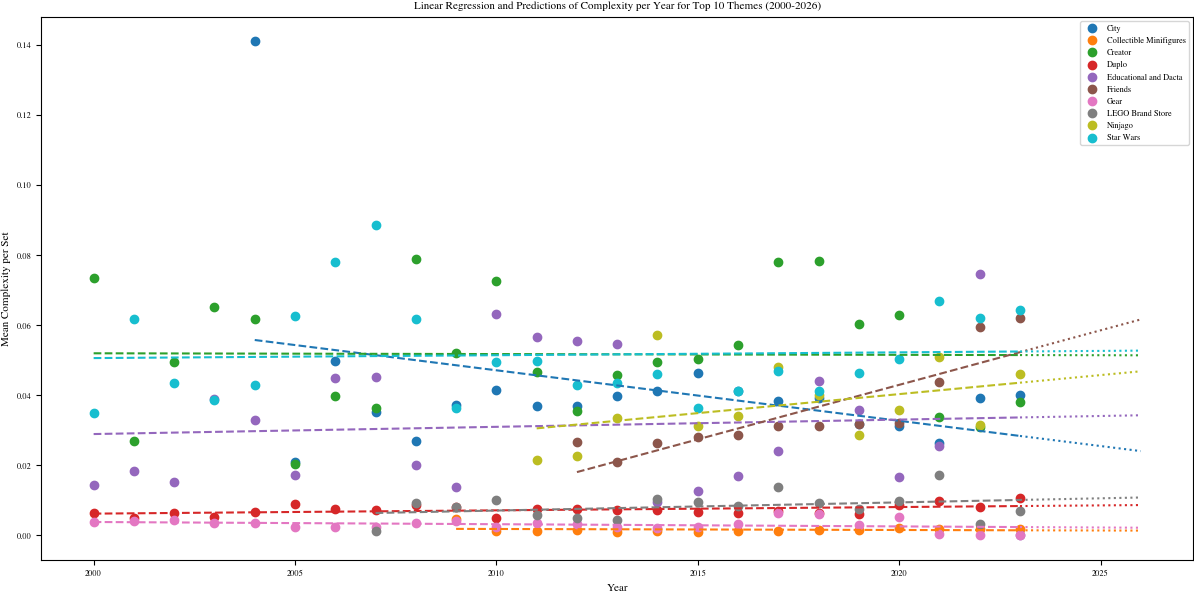

In [18]:
##### Make a linear regression for the complexity of sets with prediction until 2030 #####

def linear_regression_complexity(df):

    # filter rows between 2000 and 2023
    df = df[(df['year'] >= 2000) & (df['year'] <= 2023)]

    # group by theme_name and calculate the total number of parts for each theme
    theme_sets = df.groupby('theme_name')['set_num'].size()

    # get the top 10 themes with the most parts
    top_themes = theme_sets.nlargest(10).index

    # filter rows for top 10 themes
    df_top_themes = df[df['theme_name'].isin(top_themes)]

    # calculate mean complexity
    mean_complexity = df_top_themes.groupby(['theme_name', 'year'])['complexity_score'].mean().reset_index(name='complexity_score')

    # initialize the model
    model = LinearRegression()

    plt.figure(figsize=(12, 6))

    for theme in mean_complexity['theme_name'].unique():
        data = mean_complexity[mean_complexity['theme_name'] == theme]
        x = data['year'].values.reshape(-1, 1)
        y = data['complexity_score'].values
        model = LinearRegression().fit(x, y)
        y_pred = model.predict(x)
        plt.scatter(x, y, label=theme)
        plt.plot(x, y_pred, linestyle='--')

        # make predictions until 2026
        x_future = np.arange(2023, 2027).reshape(-1, 1)
        y_future_pred = model.predict(x_future)
        plt.plot(x_future, y_future_pred, linestyle=':', color=plt.gca().lines[-1].get_color())

    # add title and labels
    plt.title('Linear Regression and Predictions of Complexity per Year for Top 10 Themes (2000-2026)')
    plt.xlabel('Year')
    plt.ylabel('Mean Complexity per Set')
    plt.legend()

    # show the plot
    plt.show()

# call the function
linear_regression_complexity(data)

In [19]:
##### Create a list with ascending complexity over all years #####

# Calculate average complexity for each theme
average_complexity = data.groupby('theme_name')['complexity_score'].mean().reset_index()

# Sort the list by average complexity in descending order
sorted_list = average_complexity.sort_values(by='complexity_score', ascending=False)

for item in sorted_list['theme_name']:
    print(item)

LEGO Art
Modular Buildings
Ghostbusters
Icons
Sculptures
BrickLink Designer Program
Stranger Things
LEGO Ideas and CUUSOO
Factory
FIRST LEGO League
Monkie Kid
Avatar
Model Team
Chinese Traditional Festivals
Harry Potter
Sonic The Hedgehog
Architecture
Avatar: The Last Airbender
Classic
Pirates of the Caribbean
Disney
Agents
LEGO Exclusive
Technic
Discovery
Angry Birds
Indiana Jones
Dreamzzz
Monster Fighters
Make & Create
Elves
DC Super Hero Girls
The LEGO Movie
The Hobbit and Lord of the Rings
Vikings
Creator
Star Wars
Speed Champions
Speed Racer
Teenage Mutant Ninja Turtles
Hidden Side
Super Heroes Marvel
Dino
SpongeBob SquarePants
Minecraft
Super Heroes DC
Trolls: World Tour
Hobby Sets
The Lone Ranger
Dino 2010
Overwatch
Prince of Persia
Scooby-Doo
Inventor
City
Ninjago
Dino Attack
Power Miners
Friends
Super Mario
The Powerpuff Girls
Minions
Atlantis
Master Builder Academy
Exo-Force
Legends of Chima
Jurassic World
Pirates
Gabby’s Dollhouse
Time Cruisers
Freestyle
Pharaoh's Quest
Desi

In [20]:
##### General Information about data set ####

number_of_sets =data_parts['set_num'].nunique()
print(f'Number of Sets: {number_of_sets}')
number_of_parts = data_parts['part_num'].nunique()
print(f'Number of Parts: {number_of_parts}')
number_of_minifigs = data_minifigs['fig_num'].nunique()
print(f'Number of Minifigures: {number_of_minifigs}')
number_of_themes = data_parts['theme_name'].nunique()
print(f'Number of Themes: {number_of_themes}')
number_of_colors = data_parts['color_id'].nunique()
print(f'Numer of Colors: {number_of_colors}')
number_of_categories = data_parts['category_id'].nunique()
print(f'Numer of Categories: {number_of_categories}')

Number of Sets: 17077
Number of Parts: 35408
Number of Minifigures: 13546
Number of Themes: 144
Numer of Colors: 251
Numer of Categories: 66


In [22]:
print(data[data['year'] == 1960])
print()
print(data[data['year'] == 1970])

      set_num  year  theme_id             theme_name  number_of_parts   
2964   700K-1  1960       507  Educational and Dacta              476  \
14367   237-1  1960       365                 System               50   

       minifig_quantitiy  number_of_colors  number_of_categories   
2964                 0.0                 8                     8  \
14367                0.0                 1                     1   

       number_of_unique_parts  number_of_different_parts  not_unique_parts   
2964                      4.0                         60             472.0  \
14367                     NaN                         10               NaN   

       proportion_unique_to_not_unique  complexity_score  
2964                          0.008475          0.046229  
14367                              NaN               NaN  

           set_num  year  theme_id              theme_name  number_of_parts   
18           345-3  1970       411                Legoland              132  \
379 